In [27]:
import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("datasets/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.corr()#ver la correlacion entre las variables

/tmp/ipykernel_40125/4240708109.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()#ver la correlacion entre las variables


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [6]:
df.corr(method="spearman")

/tmp/ipykernel_40125/3994303778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="spearman")


,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


In [7]:
res=stats.pearsonr(df["age"],df["charges"])

In [8]:
res

PearsonRResult(statistic=0.29900819333064765, pvalue=4.886693331718192e-29)

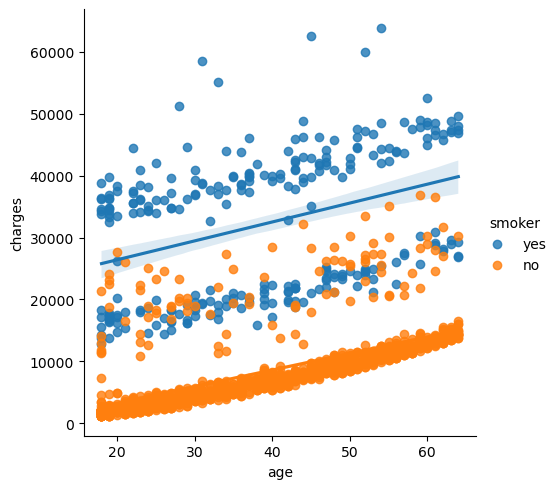

In [9]:
sns.lmplot(x="age",y="charges",hue="smoker",data=df)#con este plot busca si hay una relacion lineal entre los valores dados de x y y

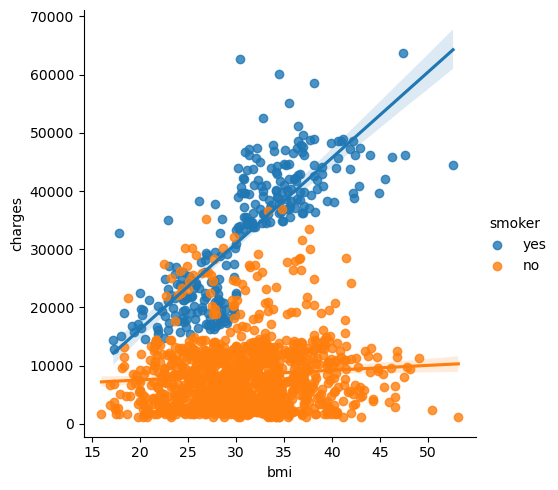

In [10]:
sns.lmplot(x="bmi",y="charges",hue="smoker",data=df)

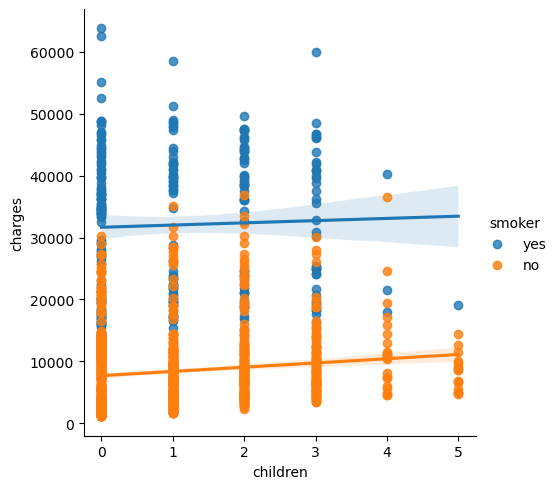

In [11]:
sns.lmplot(x="children",y="charges",hue="smoker",data=df)

In [12]:
#usamos one harding coding
df[["no","yes"]]=pd.get_dummies(df["smoker"])

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [14]:
x=df.loc[:,["age","bmi","no","yes"]]
y=df["charges"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)#separador de  mi dataset

In [16]:
model= LinearRegression()#inicializar el modelo

In [17]:
model.fit(X_train,y_train)#encuentra los coeficientes que multiplica x para encontrar la salida y

LinearRegression()

In [18]:
model.coef_

array([   264.24499688,    332.38712163, -11830.27033301,  11830.27033301])

In [19]:
model.intercept_

-229.2786990275381

In [20]:
#evaluar la regresion lineal
y_predict=model.predict(X_test)#realizar la predicion

In [22]:
mean_absolute_error(y_test, y_predict)#MAE

4203.579982683991

In [24]:
mean_squared_error(y_test,y_predict)#MSE

34382251.77765593

In [26]:
np.sqrt(mean_squared_error(y_test,y_predict))#RMSE es la mas usada

5863.638100842849

In [28]:
r2_score(y_test, y_predict)#la presicion del modelo

0.7655078324224212